#  Введение
Очистка данных (data cleaning) — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).
Цель очистки данных — избавиться от «мусора», который может помешать моделированию или исказить его результаты. Во многих задачах очистка данных — это самая главная часть этапа подготовки данных к построению модели, которая нередко занимает большую часть времени работы над задачей.
Представьте, что мы пытаемся построить чудо-модель, которая поможет нам определить оптимальные пути развития нашей небольшой компании. Для этого нам понадобятся данные из многих отделов, и все они будут представлены разными форматами: данные об активности пользователей на сайте — в виде json-формата, для данных из бухгалтерии типичен формат excel, данные о показателях развития мы достанем из базы данных. 

На руках у нас будет куча таблиц в разных форматах, которые необходимо грамотно объединить. Но и это — не наша главная проблема. 
Для того чтобы «состряпать» большой и полезный датасет, необходимо отдельно обработать каждую из таблиц. В данных будет огромное количество «мусора»: начиная с несовпадающих периодов наблюдений (компания открылась раньше, чем её сайт), наименований категорий (различные названия отделов в каждой из таблиц) и пропущенных данных (мы могли потерять их в процессе выгрузки из базы), заканчивая некорректно введёнными значениями с парой лишних или недостающих нулей, которые по случайности вбила условная бухгалтер Алевтина Петровна. 

Этот модуль даст вам знания и навыки, которые помогут справиться с типичными проблемами «грязных данных» и не растеряться, когда вы впервые с ними столкнётесь. Мы индивидуально обсудим каждую проблему и приведём несколько техник поиска её обнаружения и устранения.
## Знакомство с новыми данными: данные о квартирах от Сбера
В этом модуле мы с вами будем работать с данными с самого настоящего соревнования на платформе Kaggle, инициатором которого стал Сбер. Соревнование проводилось в 2017 году, его призовой фонд составил 25 000 $. Требования Сбера состояли в построении модели, которая бы прогнозировала цены на жильё в Москве, опираясь на параметры самого жилья, а также состояние экономики и финансового сектора в стране.
Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (train.csv). В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (macro.csv). 

Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.
## Работа с пропусками: как их обнаружить?
Работа с отсутствующими записями в таблице, пожалуй, одна из самых сложных и неоднозначных. Она же — самая распространённая для реальных данных. С неё мы и начнём!

В pandas пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»). 

Мы с вами уже сталкивались с пропусками, как только начали работать с настоящими данными. Вспомните датасеты о домах в Мельбурне и коронавирусе. 

Чем так плохи пропуски, почему так важно их предобработать?
Ответ очень прост: преобладающее большинство моделей машинного обучения не умеют обрабатывать пропуски, так как они работают только с числами. Если в данных содержится пустая ячейка таблицы, модель выдаст ошибку. 
## Причины появления пропусков в данных
* Ошибка ввода данных. Как правило, такая ошибка обусловлена человеческим фактором: никто не застрахован от случайного пропуска графы при заполнении данных.
* Ошибка передачи данных. Эта причина на сегодняшний момент возникает довольно редко: с появлением протоколов проверки выгружаемой информации потерять данные при передаче их по сети становится сложнее, но вероятность такого события ненулевая.
* Намеренное сокрытие информации. Одна из самых распространённых причин, особенно в социологических опросах. Дело в том, что пользователи/опрашиваемые/клиенты часто скрывают информацию о себе. Например, люди, занимающие высокие должности, могут быть связаны контрактом о неразглашении своих доходов. 
* Прямое отсутствие информации. Эта причина очень распространена в данных для рекомендательных систем. Представьте, что у нас есть таблицы фильмов и пользователей, которые просматривают их и ставят им оценки. Мы объединяем всю информацию в одну большую сводную таблицу: например, по строкам идут пользователи, а по столбцам — фильмы. Но вот незадача: у нас нет информации о рейтингах фильмов, которые пользователь ещё не посмотрел. В таком случае на пересечении строки с именем пользователя и столбца с названием фильма, который он ещё не смотрел, ставится пропуск. Главное несчастье состоит в том, что 99% процентов такой таблицы — это сплошной пропуск.
* Мошенничество. Очень острая проблема в финансовой сфере, особенно в банковских данных. Мошенники нередко указывают ложную информацию или не указывают её вовсе.
## Как обнаружить пропуски?
Ранее мы определяли наличие пропусков в данных с помощью метода info(). Но этот метод не позволяет точно локализовать места пропущенных значений, он выводит только число непустых значений и предназначен для определения факта наличия пропусков:
Найти пропуски зачастую довольно просто за исключением тех случаев, когда пропуски скрыты.

Ячейки с пропуском могут быть помечены специальным символом, например, “?” или “no data”).
В библиотеке pandas специально для этого реализован метод isnull(). Этот метод возвращает новый DataFrame, в ячейках которого стоят булевы значения True и False. True ставится на месте, где ранее находилось значение NaN.

Посмотрим на результат работы метода на нашей таблице:

display(sber_data.isnull().tail())
✍️ Как вы сами понимаете, результат метода isnull() — это, мягко говоря, не самый удобный метод поиска пропусков, однако он является промежуточным этапом других способов, которые мы рассмотрим далее.
## Список столбцов с пропусками
Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. 

Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.

True — 1, False — 0, при расчёте среднего получим долю 1 от общего числа строк. 
Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:


cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)
### Столбчатая диаграмма пропусков
Иногда столбцов с пропусками становится слишком много и прочитать информацию о них из списка признаков с цифрами становится слишком затруднительно — цифры начинают сливаться воедино. 

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод plot():


cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);
### Тепловая карта пропусков

Ещё один распространённый способ визуализации пропусков — тепловая карта. 

Её часто используют, когда столбцов с пропусками не так много (меньше 10). Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице. 

Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. Для этого создадим собственную палитру цветов тепловой карты с помощью метода color_palete() из библиотеки seaborn.


colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)
# Работа с пропусками: методы обработки
## Методы обработки пропущенных значений
Наибольшая сложность в очистке данных от пропусков заключается в выборе метода их обработки. Все методы, которые мы рассмотрим, по сути являются простыми эвристиками, без математического обоснования. 

Не существует общего решения проблемы с отсутствующими данными. Для каждого конкретного случая приходится подбирать наиболее подходящие методы или их комбинации. При этом каждая модель уникальна и часто предполагает случайность, поэтому невозможно предсказать заранее, какая комбинация методов сработает на ваших данных лучше всего.
### Отбрасывание записей и признаков
Первая техника — самая простая из всех. Она предполагает простое удаление записей или признаков, в которых содержатся пропуски. 

Здесь важно правильно выбрать ось удаления: если мы избавимся от большого числа строк, то рискуем потерять важные данные, а если мы удалим столбцы, то можем потерять важные признаки.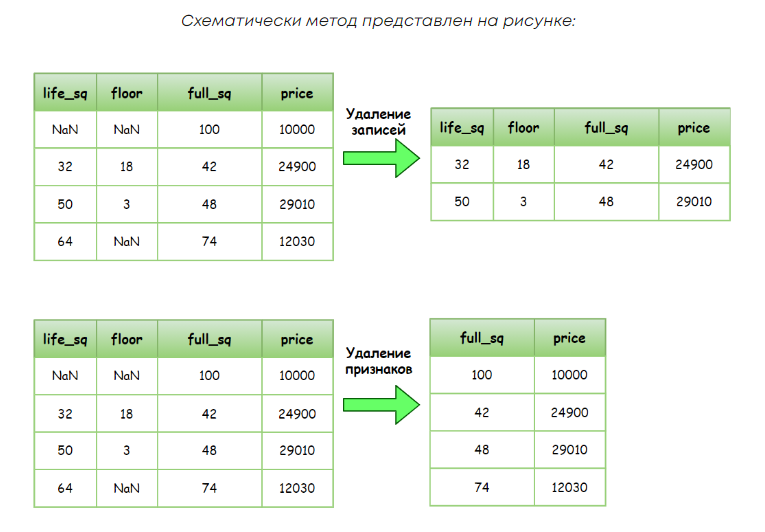
Прежде всего порассуждаем логически: в столбце hospital_beds_raion более 47% пропусков. Если мы будем удалять все строки, в которых этот признак пропущен, мы потеряем почти половину наших данных! 

Правильнее будет просто удалить столбец, ведь число мест в районных больницах — это не самый информативный признак для определения цены квартиры.

А вот если мы удалим весь столбец metro_km_walk, где менее 1% пропусков, то потеряем полезный признак при формировании прогноза цены, ведь расстояние до ближайшего метро — это важный фактор при выборе квартиры. В данном случае лучше будет удалить сами записи.

Специалисты рекомендуют при использовании метода удаления придерживаться следующих правил: удаляйте столбец, если число пропусков в нем более 30-40%. В остальных случаях лучше удалять записи.

Для удаления строк и столбцов будем использовать метод dropna(), который позволяет удалять пропуски с тонким подходом к настройке. 

Основные параметры метода:

* axis — ось, по которой производится удаление (по умолчанию 0 — строки).
* how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски). 
* thresh —  порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим в thresh значение 2, то мы удалим строки, где число пропусков больше чем n -2, где  — число признаков (если axis =0).
Примечание: Начиная с версии 1.5.0 Pandas запрещает одновременно устанавливать параметры how и thresh. При использовании этих параметров одновременно возникает ошибка:
TypeError: You cannot set both the how and thresh arguments at the same time.
Это связано с тем, что, например, если установить параметр how='all' и установить thresh в какое-то конкретное значение, то возникает противоречие: мы будем пытаться удалить столбцы/строки, одновременно при условии, что во всех столбцах/строках есть пропуски, но при этом стоит ограничение константой thresh. Метод dropna() не понимает, как действовать - какое ограничение принять за основное в таких случаях - и поэтому в новой версии библиотеки было решено запретить формирование таких условий.
Предварительно создадим копию исходной таблицы — drop_data, чтобы не повредить её. Зададимся порогом в 70%: будем оставлять только те столбцы, в которых 70 и более процентов записей не являются пустыми. После этого удалим записи, в которых содержится хотя бы один пропуск. Наконец, выведем информацию о числе пропусков и наслаждаемся нулями. 

Иначе говоря, удаляем столбцы с числом пропусков более 30 %.

#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()
Посмотрим на результирующее число записей:


print(drop_data.shape)
(20888, 60)

?
Итак, мы удалили один столбец и ⅓ всех записей для того, чтобы избавиться от пропусков. Не слишком ли это много, и что с этим можно сделать?
### Заполнение недостающих значений константами
Чтобы дырявая бочка не протекала, вставьте в дырку пробку. С этой мыслью связан другой способ бороться с пропусками — заполнение константами. 

Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков и модальным значением для категориальных признаков. 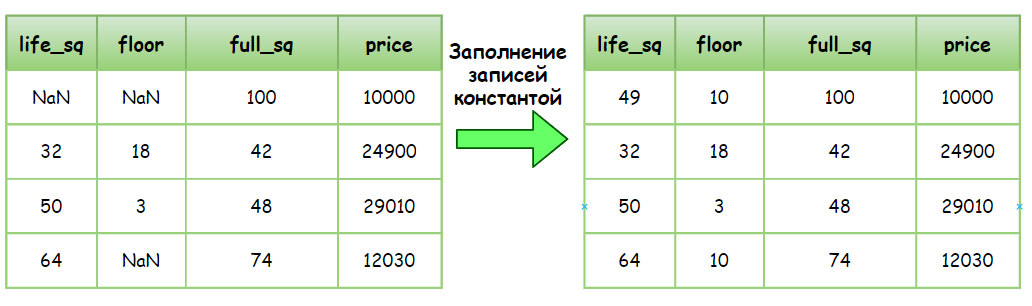
Вся сложность заключается в выборе метода заполнения. Важным фактором при выборе метода является распределение признаков с пропусками. Давайте выведем их на экран. 

В pandas это можно сделать с помощью метода hist():


cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));
Итак, рассмотрим несколько рекомендаций.

* Для распределений, похожих на логнормальное, где пик близ нуля, а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана нет. Поэтому предпочтительнее использовать медианное значение для таких признаков.
* Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. Поэтому такой признак заполняют либо модой, либо округляют до целого числа (или нужного количества знаков после запятой) среднее/медиану.
* Категориальные признаки заполняются либо модальным значением, либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'. На наше счастье, пропусков в категориях у нас нет.
* Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. Например, в наших данных есть признак full_sq (общая площадь квартиры). Давайте исходить из предположения, что, если жилая площадь (life_sq) неизвестна, то она будет равна суммарной площади!
Заполнение значений осуществляется с помощью метода fillna(). Главный параметр метода — value (значение, заполняются данные в столбце). Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 

Создадим такой словарь, соблюдая рекомендации, приведённые выше, а также копию исходной таблицы. Произведём операцию заполнения с помощью метода fillna() и удостоверимся, что пропусков в данных больше нет:


#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь 'имя столбца' : число (признак), на которое (который) надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()
Посмотрим на то, как изменились распределения наших признаков:


cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));
Обратите внимание на то, как сильно изменилось распределение для признака hospital_beds_raion. Это связано с тем, что мы заполнили модальным значением почти 47% общих данных. В результате мы кардинально исказили исходное распределение признака, что может плохо сказаться на модели.

Недостаток метода заполнения константой состоит в том, что мы можем «нафантазировать» новые данные, которые не учитывают истинного распределения.
### Заполнение недостающих значений константами с добавлением индикатора
Если мы используем заполнение пропусков константами, может быть имеет смысл сказать модели о том, что на этом месте был пропуск? 

Давайте добавим к нашим данным признаки-индикаторы, которые будут сигнализировать о том, что в столбце на определённом месте в таблице был пропуск. Это место в столбце-индикаторе будем помечать как True. 

Эта эвристика пытается снизить влияние искажения признака, указав модели на места, где мы «нафантазировали» данные.
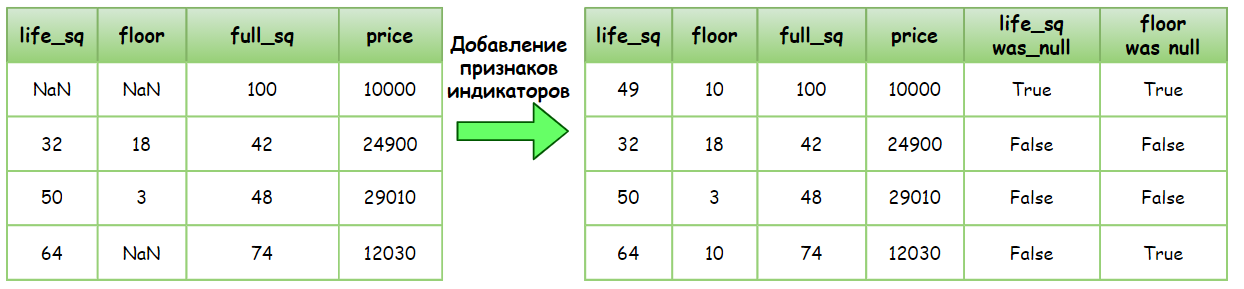
Посмотрим на реализацию. Как обычно, создадим копию indicator_data исходной таблицы. В цикле пройдёмся по столбцам с пропусками и будем добавлять в таблицу новый признак (с припиской "was_null"), который получается из исходного с помощью применения метода isnull(). После чего произведём обычное заполнение пропусков, которое мы совершали ранее, и выведем на экран число отсутствующих значений в столбце, чтобы убедиться в результате:


#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь 'имя столбца' : число (признак), на которое (который) надо заменить пропуски
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()
Метод исходит из предположения, что, если дать модели информацию о том, что в ячейке ранее была пустота, то она будет меньше доверять таким записям и меньше учитывать её в процессе обучения. Иногда такие фишки действительно работают, иногда не дают эффекта, а иногда и вовсе могут ухудшить результат обучения и затруднить процесс обучения.

Когда мы добавляем признаки-индикаторы, мы повышаем размерность наших данных. Теперь представьте, что столбцов с пропусками сотня, по паре штук в каждом. 

Не нужно знать высшую математику, чтобы понять, что в таком случае мы увеличим размерность исходной таблицы ещё на сотню и 99% строк этих столбцов будут заполнены нулями (False). При увеличении размерности в данных время обучения некоторых моделей растет экспоненциально — увеличив число признаков в два раза, вы увеличите время обучения в 7.38 раза! И при этом, возможно, даже не получите прироста в качестве. 

Более того, существует такое понятие, как проклятие размерности. Когда мы с вами будем обучать модели, мы будем искать глобальный минимум некоторой функции потерь. Размерность этой функции определяется числом признаков, на которых мы обучаем алгоритм. 

Проклятие размерности гласит, что, увеличивая размерность функции, мы повышаем сложность поиска этого минимума и рискуем вовсе не найти его! Об этом страшном проклятии мы ещё будем говорить в курсе по ML и даже попробуем его победить. Но об этом чуть позже.

Однако, несмотря на свои недостатки, этот метод кажется наиболее логичным из предложенных ранее и часто используется в очистке данных.
### Комбинирование методов
Наверняка вы уже догадались, что необязательно использовать один метод. Вы можете их комбинировать. Например, мы можем:

удалить столбцы, в которых более 30% пропусков;
удалить записи, в которых более двух пропусков одновременно;
заполнить оставшиеся ячейки константами.
Посмотрим на реализацию такого подхода в коде:


#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца' : число (признак), на которое (который) надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())
Выведем результирующее число строк и столбцов:


print(combine_data.shape)
Вы можете придумывать свои собственные комбинации методов и использовать их для борьбы с пропусками, главное — найти баланс между потерей информации и её искажением.

Примечание. Стоит отметить, что предположение о том, что жилая площадь равна общей, слишком тривиально. Порассуждаем логически. Очевидно, что обычно в квартире есть хотя бы санузел, который не учитывается в жилой площади, и тогда жилая площадь будет меньше общей. Если взять соотношение жилой площади к общей площади и построить boxplot в log-масштабе, то медиана будет на около 0.6, а значение 1 (жилая = общая) не войдёт даже в последний квартиль. Поэтому в реальной задаче такая оценка соотношения площадей является не совсем корректной.
### Резюме по методам работы с пропусками
Итак, мы рассмотрели основные методы решения проблемы с недостающей информацией, а также их недостатки. 

Ещё раз хотим подчеркнуть, что выбор метода или комбинации методов является исключительно вашим решением. Однако важно держать в голове несколько рекомендаций:

* Если какой-то из признаков имеет более 30-40% пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных. Однако если этот признак очень важен для прогнозирования, вам придётся поколдовать над ним, чтобы «заплатки», которыми вы закрываете пропуски, выглядели правдоподобно.
* Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
* Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.
* Если вам позволяют сроки вашего проекта, попробуйте несколько кардинально разных подходов работы с пропусками.
### Другие методы заполнения отсутствующих значений
Существуют и другие популярные способы избавиться от дыр в данных. Приведём только идею методов и их краткое описание.

Например, можно предсказать пропуски с помощью модели. Такой подход основывается на том, что вы считаете признак с отсутствующими значениями целевым, а остальные признаки — факторами и строите модель, предсказывающую пропуски в данных. На практике часто для заполнения «дыр» в данных используют метод ближайшего соседа (KNN) или линейную регрессию.

Ещё один подход — заполнение, основанное на группах. Можно сгруппировать данные по некоторым признакам и заполнять константой, полученной в группе. Например, в наших данных для признака жилой площади можно было бы заполнять пропуски средней площадью квартир в районе.
# Выбросы: почему появляются и чем опасны?
Ещё одна типичная проблема для больших данных — это наличие в них выбросов. 
Выброс (аномалия) — это наблюдение, которое существенно выбивается из общего распределения и сильно отличается от других данных.
→ Мы с вами уже сталкивались с аномалиями. Вспомните данные о коронавирусе и вот этот график ежедневной заболеваемости в мире: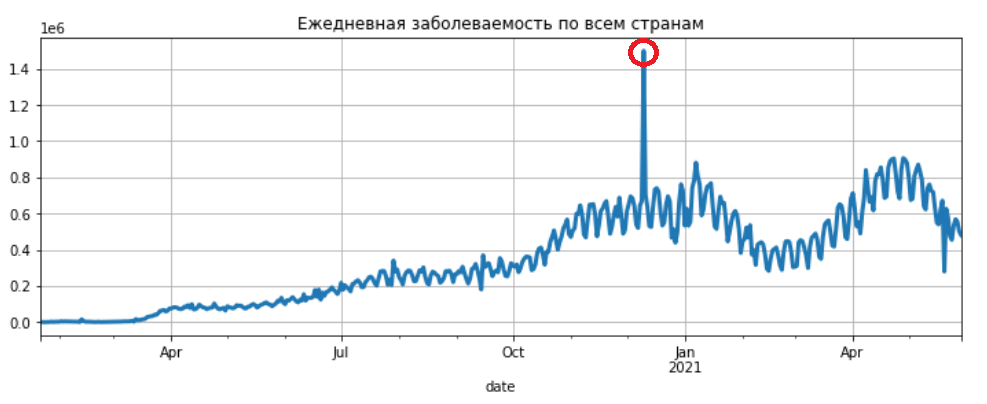Тот самый пик в 1.4 млн заболевших в день определённо можно считать аномальным. Перед тем, как пытаться спрогнозировать такой временной ряд, рекомендуется заменить это наблюдение чем-то адекватным: например, средним между наблюдениями справа и слева от аномалии.
## Чем опасны выбросы?
Выбросами могут быть как действительно реальные отклонения в данных (например, квартира в Москва-Сити за 2 млрд рублей выбивается из общего распределения, но она является вполне реальной), так и просто ошибкой (работа студента, оцененная в 8 баллов при наличии пятибалльной шкалы).

Так или иначе, проблема выбросов состоит в том, что они могут «шокировать» модель. 

Модели — это математические методы, которые оперируют числами и пытаются подстроить зависимости в данных, чтобы выдать верный ответ. Когда модель сталкивается с выбросом, она пытается подстроиться и под него. В результате зависимость искажается, качество моделирования падает. Иногда выбросов может быть так много, что модель и вовсе начинает выдавать какую-то белиберду. Такие модели, конечно, никому не нужны, поэтому специалисты особенно озадачены поиском аномалий в данных.

Чаще всего выбросы либо исключают из данных, либо корректируют значения на что-то правдоподобное, либо, если выбросов много, создают специальный датасет и обучают модели для них отдельно.
## Причины появления выбросов
* Ошибка ввода данных. Как и с пропусками, здесь играет роль человеческий фактор. Ввести лишний «ноль» на клавиатуре и не заметить этого — нередкий случай.
* Ошибки отбора выборки. Когда начинающие специалисты составляют обучающую выборку для моделирования, они часто допускают ошибку, не выделив в отдельную группу часть данных. Типичный пример: смешать вместе данные об уровне жизни среднего класса, опрошенного на улице, и добавить туда людей из списка Forbes.
* Преднамеренное искажение или мошенничество. Пользователи приложения часто намеренно указывают неверные данные о себе. Например, прибавляют к своему возрасту лишнюю сотню лет, создавая головную боль дата-сайентистам.
Демографы называют такое искажение «старческим кокетством» не просто так: в исследованиях, в которых возраст записывается со слов респондента, пожилые люди склонны преувеличивать и округлять свой возраст, что приводит к повышенным значениям вокруг цифр 80, 90 и 100. Так, в 2019 году в России зафиксировали рекордное число долгожителей!
# Методы выявления выбросов
## Метод ручного поиска и здравого смысла
Это самый трудоёмкий метод, основанный на житейской логике, методе пристального взгляда и небольшом количестве статистики. Он предполагает поиск невозможных и нелогичных значений в данных.

Пусть у нас есть признак, по которому мы будем искать выбросы. Давайте рассчитаем его статистические показатели (минимум, максимум, среднее, квантили) и по ним попробуем определить наличие аномалий.

Сделать это можно с помощью уже знакомого вам метода describe(). Рассчитаем статистические показатели для признака жилой площади (life_sq).

sber_data['life_sq'].describe()
Найдём число квартир с нулевой жилой площадью:

print(sber_data[sber_data['life_sq'] == 0].shape[0])
 45

?
Таких помещений оказывается 45 штук. Что это за зверь?

Это могут быть апартаменты — вид коммерческой недвижимости, которая юридически не является жилой площадью, но законно продаётся по ценам, сопоставимым с квартирными. Оставим их в покое.     

А теперь выведем здания с жилой площадью более 7 000 квадратных метров:

display(sber_data[sber_data['life_sq'] > 7000])
## Метод межквартильного размаха (метод Тьюки)
Отличным помощником в поиске потенциальных выбросов является визуализация. Если признак является числовым, то можно построить гистограмму или коробчатую диаграмму, чтобы найти аномалии.

На гистограмме мы можем увидеть потенциальные выбросы как низкие далеко отстоящие от основной группы столбцов «пеньки», а на коробчатой диаграмме — точки за пределами усов.

✍️ Построим гистограмму и коробчатую диаграмму для признака полной площади (full_sq):

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');
Квантили вычисляются с помощью метода quantile(). Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
## Метод z-отклонений (метод сигм)
Последний метод, который мы рассмотрим, это метод, основанный на правиле трёх сигм для нормального распределения. 

Правило трёх сигм гласит: если распределение данных является нормальным, то 99,73% лежат в интервале от , где  μ (мю) — математическое ожидание (для выборки это среднее значение), а  σ (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

Схематично правило трёх сигм для нормального распределения представлено на рисунке ниже: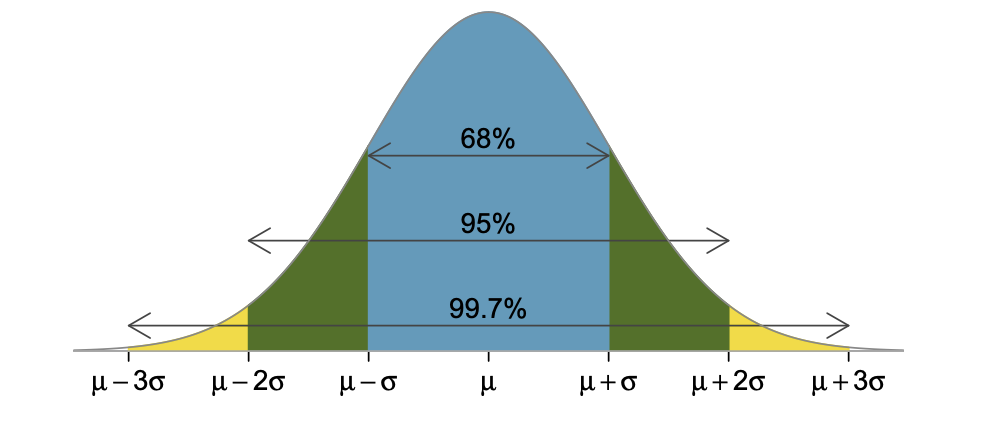
?
А что делать, если данные не распределены нормально? 

На такой случай есть один трюк. Иногда для распределений, похожих на логнормальное, может помочь логарифмирование. Оно может привести исходное распределение к подобию нормального. Причем основание логарифма может быть любым.

✍️ Рассмотрим логарифмирование на примере. 

Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');
## Резюме по методам поиска выбросов
Мы рассмотрели классические методы выявления аномальных данных. Как вы сами поняли, каждый из них имеет свои преимущества и недостатки.

* Метод ручного поиска тяжело автоматизировать, однако вы сами организовываете проверки, следите за процессом отсеивания выбросов и руководствуетесь не только статистикой, но и здравым смыслом. К тому же из всех представленных только этот метод способен выявить логические нестыковки в данных (например, общая площадь меньше жилой или число этажей более 77 в районе, где нет таких зданий). Обычно этот метод используется в комплексе с другими, чтобы удостовериться в том, что найденные данные действительно являются выбросами, и произвести логическую очистку, на которую неспособны другие методы.
* Методы межквартильного размаха и z-отклонений довольно просты в реализации и основаны на стройной математической теории, а не на эвристиках. Но это их преимущество и недостаток. Оба метода разработаны для данных, распределённых приблизительно нормально. Проблема в том, что далеко не всё в мире имеет нормальное распределение. Необходимо внимательно «рыться» в данных, совершать дополнительные преобразования, чтобы привести их хотя бы к подобию нормального распределения, либо подбирать границы методов, чтобы учитывать особенности распределений. В противном случае методы начинают считать выбросами всё, что не вписывается в жёсткие границы, и вы рискуете лишиться важных данных! Учитывайте это в своей работе и всегда проверяйте результаты.
# Работа с дубликатами и неинформативными признаками
Дубликаты
Иногда данные могут содержать повторяющиеся записи (дубликаты).

Дубликатами называются записи, для которых значения (всех или большинства) признаков совпадают. 
## Чем опасны дубликаты?
Дублирующаяся информация никогда не приводит ни к чему хорошему. В Data Science одинаковые записи не несут полезной информации и искажают реальную статистику. Модель несколько раз видит одно и то же наблюдение и начинает подстраиваться под него. Если дубликатов много, это может стать большой проблемой при обучении.
## Обнаружение и ликвидация дубликатов
Способ обнаружения дубликатов зависит от того, что именно вы считаете дубликатом. Например, за дубликаты можно посчитать записи, у которых совпадают все признаки или их часть. Если в таблице есть столбец с уникальным идентификатором (id), вы можете попробовать поискать дубликаты по нему: одинаковые записи могут иметь одинаковый id.

✍️ Проверим, есть у нас такие записи: для этого сравним число уникальных значений в столбце id с числом строк. Число уникальных значений вычислим с помощью метода nunique():

sber_data['id'].nunique() == sber_data.shape[0]
Вроде бы всё в порядке: каждой записи в таблице соответствует свой уникальный идентификатор. Но это ещё не означает, что в таблице нет дубликатов!

Столбец с id задаёт каждой строке свой уникальный номер, поэтому сама по себе каждая строка является уникальной. Однако содержимое других столбцов может повторяться.

Чтобы отследить дубликаты, можно воспользоваться методом duplicated(), который возвращает булеву маску для фильтрации. Для записей, у которых совпадают признаки, переданные методу, он возвращает True, для остальных — False.

У метода есть параметр subset — список признаков, по которым производится поиск дубликатов. По умолчанию используются все столбцы в DataFrame и ищутся полные дубликаты.

✍️ Найдём число полных дубликатов таблице sber_data. Предварительно создадим список столбцов dupl_columns, по которым будем искать совпадения (все столбцы, не включая id). 

Создадим маску дубликатов с помощью метода duplicated() и произведём фильтрацию. Результат заносим в переменную sber_duplicates. Выведем число строк в результирующем DataFrame:

dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')
Теперь нам необходимо от них избавиться. Для этого легче всего воспользоваться методом drop_duplicates(), который удаляет повторяющиеся записи из таблицы. 

✍️ Создадим новую таблицу sber_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.

sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')
## Неинформативные признаки
Отсутствием новой и полезной информации могут «похвастаться» не только отдельные записи в таблице, но и целые признаки.

Неинформативными называются признаки, в которых большая часть строк содержит одинаковые значения (например, пол клиентов в мужском барбершопе), либо наоборот — признак, в котором для большинства записей значения уникальны (например, номер телефона клиента). 

Мы уже сталкивались с неинформативными признаками. Вспомните датасет о домах в Мельбурне, где был признак адреса дома с уникальным значением для каждого дома. 
## Чем опасны неинформативные признаки?
Такие признаки не играют роли при моделировании и лишь засоряют таблицу, увеличивая размерность данных. Они усиливают уже знакомое нам проклятие размерности, которое увеличивает время обучения модели и потенциально может снизить ее качество. 

Поэтому от таких признаков необходимо безжалостно избавляться.
## Обнаружение и ликвидация неинформативных признаков
Чтобы считать признак неинформативным, прежде всего нужно задать какой-то определённый порог. Например, часто используют пороги в 0.95 и 0.99. Это означает: признак неинформативен, если в нем 95% (99%) одинаковых значений или же 95% (99%) данных полностью уникальны.

К сожалению, в pandas пока нет волшебной палочки, которая мгновенно бы выдавала список столбцов, обладающих низкой информативностью. Однако процедура их поиска легко реализуется вручную.

Разберём алгоритм:

→ Создаём пустой список low_information_cols, куда будем добавлять названия признаков, которые мы посчитаем неинформативными.

→ В цикле пройдёмся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:

рассчитаем top_freq — наибольшую относительную частоту с помощью метода value_counts() с параметром normalize=True. Метод вернёт долю от общих данных, которую занимает каждое уникальное значение в признаке.
Например, для столбца oil_chemistry_raion (нефтехимический район) результат будет следующим:



Отсюда нам нужен максимум.

рассчитаем nunique_ratio — отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных значений в столбце получим с помощью метода nunique(), а размер признака — с помощью метода count(). Например, для столбца id число уникальных значений — 30471; оно же равно размеру таблицы. Поэтому результат отношения будет 1.
сравним каждое из полученных чисел с пороговым значением (у нас это 0.95) и добавим в список неинформативных признаков, если условие истинно.
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        Итак, мы нашли шесть неинформативных признаков. Теперь можно удалить их с помощью метода drop(), передав результирующий список в его аргументы.

information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')
Важность признаков
На самом деле информативность признаков определяется не только числом уникальных значений, но и их влиянием на целевой признак (тот, который мы хотим предсказать). Это называется важностью признака. 

Признаки, которые обладают низкой важностью, называют нерелевантными признаками. 

Например, если бы в наших данных о квартирах был признак, содержащий информацию о температуре воздуха за окном, он был бы нерелевантным.

Нерелевантные признаки могут быть не такими очевидными. В таких случаях применяются более сложные способы их поиска с использованием статистики и моделей машинного обучения. Мы поговорим об этом позже, когда вплотную подойдём к Machine Learning.